Eine Software soll automatisiert entscheiden, ob der Weizen geerntet werden sollte oder noch gewartet werden sollte. Die Erfahrungswerte eines Landwirts sind über einen längeren 
Zeitraum zusammengetragen und protokolliert worden!

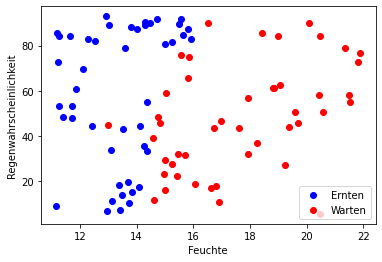

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
data = pd.read_csv('ErnteBauern.csv')

# Daten nach Ergebnis filtern
ernten = data[data['Ergebnis'] == 'Ernten']
warten = data[data['Ergebnis'] == 'Warten']

# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label="Ernten")
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label="Warten")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

plt.legend()
#
# Diagramm anzeigen
plt.show()


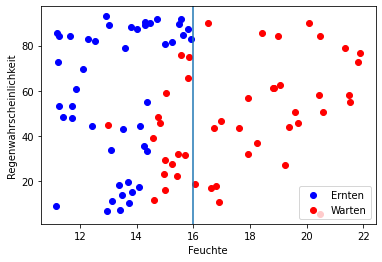

In [5]:
# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label="Ernten")
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label="Warten")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

plt.legend()
#
# Diagramm anzeigen
plt.axvline(x=16)
plt.show()



Aufteilen in zwei Mengen

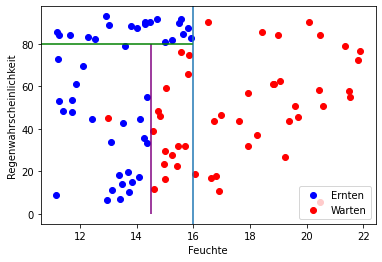

In [6]:

# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label='Ernten')
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label='Warten')

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

# Legende hinzufügen
plt.legend()

# Senkrechte Linie bei x=16 zeichnen
plt.axvline(x=16,ymin=0)

plt.vlines(x=14.5, ymin=0, ymax=80, color='purple')


# Horizontale Linie bei y=80 und x=15.5 zeichnen
plt.axhline(y=80, xmin=0, xmax=16/35.5, color='green')

# Diagramm anzeigen
plt.show()


In [7]:
m1 = data[data['Feuchte'] < 16]
m2 = data[data['Feuchte'] >= 16]

m2

,Feuchte,Regenwahrscheinlichkeit,Ergebnis
0,17.94,56.89,Warten
3,18.25,36.97,Warten
4,16.52,90.11,Warten
8,19.59,50.62,Warten
13,17.93,32.04,Warten
16,19.37,43.79,Warten
20,20.58,50.79,Warten
23,16.97,46.66,Warten
25,21.37,79.13,Warten
40,18.99,84.35,Warten


Die Formel zur Berechnung der Wahrscheinlichkeit eines Ereignisses ist:

$$P(x_i) = \frac{n_i}{N}$$

wobei $n_i$ die Anzahl der Beispiele ist, in denen das Element $x_i$ auftritt und $N$ die Gesamtzahl der Beispiele im Array ist.

Die Shannon-Entropie-Formel zur Berechnung der Entropie lautet wie folgt:

$$H(X) = -\sum_{i=1}^n P(x_i) \log_2(P(x_i))$$

wobei $P(x_i)$ die Wahrscheinlichkeit des Ereignisses $x_i$ ist und $\log_2$ der Logarithmus zur Basis 2 ist.

In [8]:
import math

def calcEntropie(m):
    N=len(m)
    n_ernten=0
    n_warten=0
    for i in m["Ergebnis"]:
        if i=="Ernten":
            n_ernten=n_ernten+1;
        if i=="Warten":
            n_warten=n_warten+1;
    #print("Anzahl von Ernten="+str(n_ernten))
    #print("Anzahl von Warten="+str(n_warten))
    if (n_ernten==0):
        return 0
    if (n_warten==0):
        return 0
    P_ernten=n_ernten/N
    P_warten=n_warten/N
    #print("Wahrscheinlichkeit Ernten="+str(P_ernten))
    #print("Wahrscheinlichkeit Warten="+str(P_warten))
    if P_ernten==0:
        return 0;
    if P_warten==0:
        return 0;
    E=-1*(P_ernten*math.log2(P_ernten)+P_warten*math.log2(P_warten))
    return E

e1=calcEntropie(m1)
print("Entropie e1 ist "+str(e1))
e2=calcEntropie(m2)
print("Entropie e2 ist "+str(e2))

Entropie e1 ist 0.8301899714180443
Entropie e2 ist 0


In [9]:
dat= []
for i in range(110,220):
    m1 = data[data['Feuchte'] < i/10]
    m2 = data[data['Feuchte'] >= i/10]
    e1=calcEntropie(m1)
    e2=calcEntropie(m2)
    #print("i="+str(i/10))
    #print("e1="+str(e1))
    #print("e2="+str(e2))
    dat.append([i/10,e1,e2])

df=pd.DataFrame(dat)
df

,0,1,2
0,11.0,0.000000,0.999913
1,11.1,0.000000,0.999913
2,11.2,0.000000,0.999180
3,11.3,0.000000,0.996486
4,11.4,0.000000,0.996486
...,...,...,...
105,21.5,0.999627,0.000000
106,21.6,0.999909,0.000000
107,21.7,0.999909,0.000000
108,21.8,0.999909,0.000000


In [10]:
dat2= []
for i in range(10,900):
    m1 = data[data['Regenwahrscheinlichkeit'] < i/10]
    m2 = data[data['Regenwahrscheinlichkeit'] >= i/10]
    e1=calcEntropie(m1)
    e2=calcEntropie(m2)
    #print("i="+str(i/10))
    #print("e1="+str(e1))
    #print("e2="+str(e2))
    dat2.append([i/10,e1,e2])

df2=pd.DataFrame(dat2)
df2

,0,1,2
0,1.0,0.000000,0.999913
1,1.1,0.000000,0.999913
2,1.2,0.000000,0.999913
3,1.3,0.000000,0.999913
4,1.4,0.000000,0.999913
...,...,...,...
885,89.5,0.997381,0.811278
886,89.6,0.997381,0.811278
887,89.7,0.998364,0.863121
888,89.8,0.998364,0.863121


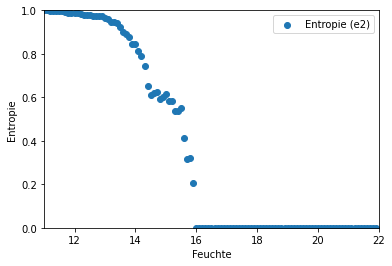

In [11]:
import numpy as np
arr=np.array(dat)
# Diagramm erstellen

x_data = [row[0] for row in arr]
y1_data = [row[1] for row in arr]
y2_data = [row[2] for row in arr]

#plt.scatter(x_data,y1_data,label="Entropie (e1)")
plt.scatter(x_data,y2_data,label="Entropie (e2)")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Entropie')

# Legende hinzufügen

plt.xlim(11, 22)
plt.ylim(0, 1)

plt.legend()
# Diagramm anzeigen
plt.show()

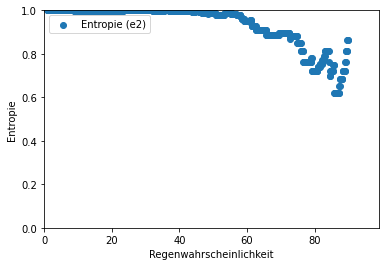

In [12]:
import numpy as np
arr=np.array(dat2)
# Diagramm erstellen

x_data = [row[0] for row in arr]
y1_data = [row[1] for row in arr]
y2_data = [row[2] for row in arr]

#plt.scatter(x_data,y1_data,label="Entropie (e1)")
plt.scatter(x_data,y2_data,label="Entropie (e2)")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Regenwahrscheinlichkeit')
plt.ylabel('Entropie')

# Legende hinzufügen

plt.xlim(0, 99)
plt.ylim(0, 1)

plt.legend()
# Diagramm anzeigen
plt.show()

## Erzeugen des Entscheidungsbaumes mit SKLEARN

In [13]:
from sklearn import tree
y = data['Ergebnis']
x = data.drop(['Ergebnis'], axis=1)
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(x, y)

# Beispieldaten [[Feuchte,Regenwahrscheinlichkeit]]
neues_beispiel = [[20, 90]]
vorhersage = clf.predict(neues_beispiel)

print(vorhersage)

['Warten']


c:\Users\jtutt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualisieren des Entscheidungsbaumes

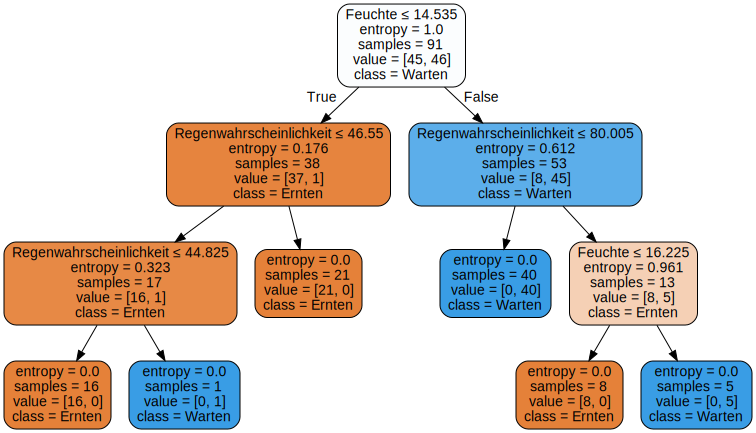

In [14]:
from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz

# exportiere Baum in DOT-Format
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=x.columns.values.tolist(),
                     class_names=['Ernten', 'Warten'], 
                     filled=True, rounded=True,
                     special_characters=True)
                     
# konvertiere DOT-Format zu einem Graph-Objekt
graph = graphviz.Source(dot_data)
display(graph)


## Validierung des Entscheidungsbaumes

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Laden Sie den Testdatensatz
test_data = pd.read_csv('ErnteBauern2.csv')

# Trennen Sie die Zielvariable vom Rest der Daten
X_test = test_data.drop('Ergebnis', axis=1)
y_test = test_data['Ergebnis']


# Führen Sie Vorhersagen auf dem Testdatensatz durch
y_pred = clf.predict(X_test)

# Berechnen Sie die Vorhersagegenauigkeit auf dem Testdatensatz
accuracy = accuracy_score(y_test, y_pred)
print("Vorhersagegenauigkeit auf dem Testdatensatz: {:.2f}%".format(accuracy * 100))



Vorhersagegenauigkeit auf dem Testdatensatz: 96.67%
